# Dimensionality Reduction: PCA

Dimensionality reduction is the task of deriving a set of new
artificial features that is smaller than the original feature
set while retaining most of the variance of the original data.
Here we'll use a common but powerful dimensionality reduction
technique called Principal Component Analysis (PCA).
We'll perform PCA on the iris dataset that we saw before:

##  Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

PCA is performed using linear combinations of the original features
using a truncated Singular Value Decomposition of the matrix X so
as to project the data onto a base of the top singular vectors.
If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset.

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [3]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Other attributes are available as well:

### unit vector

In [4]:
print("|v1| = %5f" %np.sqrt(np.power(pca.components_[0],2).sum()))

|v1| = 1.000000


### orthogonal vectors

In [5]:
print("inner product of v1 and v2 = %5f" % np.dot(pca.components_[0],pca.components_[1]))

inner product of v1 and v2 = 0.000000


### explained_variance_ratio_

In [6]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [7]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

Let us project the iris dataset along those first two dimensions:

In [8]:
X_pca = pca.transform(X)

PCA `normalizes` and `whitens` the data, which means that the data
is now centered on both components with unit variance:

In [9]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([-0., -0.])

In [10]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.])

Furthermore, the samples components do no longer carry any linear correlation:

In [11]:
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,   1.10932930e-15],
       [  1.10932930e-15,   1.00000000e+00]])

We can visualize the projection using pylab, but first
let's make sure our ipython notebook is in pylab inline mode

In [12]:
pca.get_covariance()

array([[  2.3453309 ,  -0.49569154,   5.38369356,   2.25535968],
       [ -0.49569154,   0.19285   ,  -1.23195741,  -0.51613991],
       [  5.38369356,  -1.23195741,  12.81812983,   5.34864429],
       [  2.25535968,  -0.51613991,   5.34864429,   2.29147508]])

In [13]:
pca.get_precision()

array([[ 13.10906772,  -3.8862293 ,  -5.00689389,  -2.09097033],
       [ -3.8862293 ,  14.59774693,   2.58101052,   1.0885641 ],
       [ -5.00689389,   2.58101052,   4.99942038,  -6.16005484],
       [ -2.09097033,   1.0885641 ,  -6.16005484,  17.1180931 ]])

In [14]:
np.cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

Now we can visualize the results using the following utility function:

In [15]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

Now calling this function for our data, we see the plot:

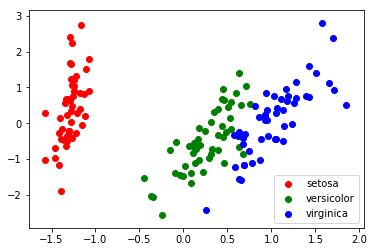

In [16]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

## S curve

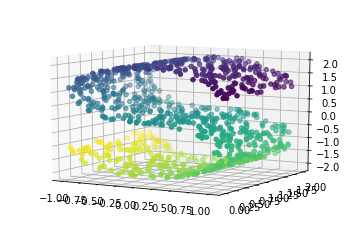

In [17]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60)

This is a 2-dimensional dataset embedded in three dimensions, but it is embedded
in such a way that PCA cannot discover the underlying data orientation:

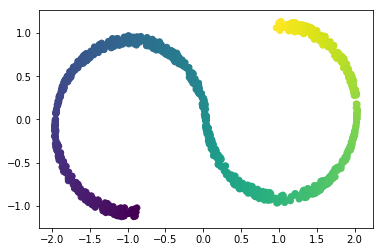

In [18]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

Manifold learning algorithms, however, available in the ``sklearn.manifold``
submodule, are able to recover the underlying 2-dimensional manifold:

## Digits dataset

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

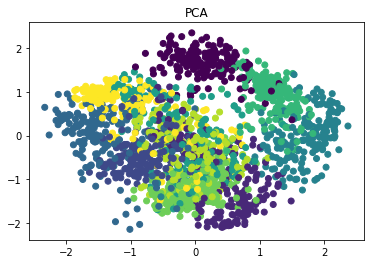

In [20]:
from sklearn.decomposition import PCA

plt.figure()
pca = PCA(n_components=2, whiten=True)
projection = pca.fit_transform(digits.data)
plt.scatter(projection[:, 0], projection[:, 1], c=digits.target)
plt.title(pca.__class__.__name__)
